In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.cluster import KMeans , DBSCAN
from pandas_profiling import ProfileReport
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


In [133]:
df = pd.read_csv("C:\\Users\\rohan\\Downloads\\sales_data.csv")
pd.set_option("display.max_columns", None)


In [134]:
df.head()

,CustomerID,TOTAL_ORDERS,REVENUE,AVERAGE_ORDER_VALUE,CARRIAGE_REVENUE,AVERAGESHIPPING,FIRST_ORDER_DATE,LATEST_ORDER_DATE,AVGDAYSBETWEENORDERS,DAYSSINCELASTORDER,MONDAY_ORDERS,TUESDAY_ORDERS,WEDNESDAY_ORDERS,THURSDAY_ORDERS,FRIDAY_ORDERS,SATURDAY_ORDERS,SUNDAY_ORDERS,MONDAY_REVENUE,TUESDAY_REVENUE,WEDNESDAY_REVENUE,THURSDAY_REVENUE,FRIDAY_REVENUE,SATURDAY_REVENUE,SUNDAY_REVENUE,WEEK1_DAY01_DAY07_ORDERS,WEEK2_DAY08_DAY15_ORDERS,WEEK3_DAY16_DAY23_ORDERS,WEEK4_DAY24_DAY31_ORDERS,WEEK1_DAY01_DAY07_REVENUE,WEEK2_DAY08_DAY15_REVENUE,WEEK3_DAY16_DAY23_REVENUE,WEEK4_DAY24_DAY31_REVENUE,TIME_0000_0600_ORDERS,TIME_0601_1200_ORDERS,TIME_1200_1800_ORDERS,TIME_1801_2359_ORDERS,TIME_0000_0600_REVENUE,TIME_0601_1200_REVENUE,TIME_1200_1800_REVENUE,TIME_1801_2359_REVENUE
0,22,124,11986.54,96.67,529.59,4.27,30-Dec-16,24-Oct-21,14.19,1,13,13,29,25,19,15,10,1287.50,1054.15,2842.52,2133.79,2051.94,1496.33,1120.31,28,42,30,24,2685.37,4299.28,2592.18,2409.71,12,61,37,14,1067.92,5674.65,3916.53,1327.44
1,29,82,11025.96,134.46,97.92,1.19,31-Mar-18,24-Oct-21,15.89,1,11,13,10,13,14,10,11,1253.08,2003.25,1819.75,1114.83,1791.86,1624.34,1418.85,18,19,19,26,1336.09,2776.02,2807.66,4106.19,1,13,24,44,30.25,3143.69,2205.47,5646.55
2,83,43,7259.69,168.83,171.69,3.99,30-Nov-17,24-Oct-21,33.12,1,5,4,3,5,5,8,13,698.95,504.97,197.97,1182.97,733.96,1223.96,2716.91,9,11,6,17,2299.93,1383.92,713.94,2861.90,0,6,12,25,0.00,707.98,2560.91,3990.80
3,95,44,6992.27,158.92,92.82,2.11,9-Apr-19,24-Oct-21,21.11,1,10,8,5,8,5,3,5,1753.95,1400.23,570.48,1154.06,798.07,630.00,685.48,12,15,9,8,2317.95,2417.22,997.02,1260.08,0,10,13,21,0.00,1908.99,2025.05,3058.23
4,124,55,6263.44,113.88,179.04,3.26,23-Oct-20,24-Oct-21,6.65,1,2,3,8,8,12,10,12,150.98,330.38,1090.23,563.63,1339.44,956.56,1832.22,10,18,21,6,831.14,1938.18,2725.66,768.46,6,9,27,13,501.34,1197.83,3004.77,1559.50


In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 40 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CustomerID                 5000 non-null   int64  
 1   TOTAL_ORDERS               5000 non-null   int64  
 2   REVENUE                    5000 non-null   float64
 3   AVERAGE_ORDER_VALUE        5000 non-null   float64
 4   CARRIAGE_REVENUE           5000 non-null   float64
 5   AVERAGESHIPPING            5000 non-null   float64
 6   FIRST_ORDER_DATE           5000 non-null   object 
 7   LATEST_ORDER_DATE          5000 non-null   object 
 8   AVGDAYSBETWEENORDERS       5000 non-null   float64
 9   DAYSSINCELASTORDER         5000 non-null   int64  
 10  MONDAY_ORDERS              5000 non-null   int64  
 11  TUESDAY_ORDERS             5000 non-null   int64  
 12  WEDNESDAY_ORDERS           5000 non-null   int64  
 13  THURSDAY_ORDERS            5000 non-null   int64

In [136]:
df.describe()

,CustomerID,TOTAL_ORDERS,REVENUE,AVERAGE_ORDER_VALUE,CARRIAGE_REVENUE,AVERAGESHIPPING,AVGDAYSBETWEENORDERS,DAYSSINCELASTORDER,MONDAY_ORDERS,TUESDAY_ORDERS,WEDNESDAY_ORDERS,THURSDAY_ORDERS,FRIDAY_ORDERS,SATURDAY_ORDERS,SUNDAY_ORDERS,MONDAY_REVENUE,TUESDAY_REVENUE,WEDNESDAY_REVENUE,THURSDAY_REVENUE,FRIDAY_REVENUE,SATURDAY_REVENUE,SUNDAY_REVENUE,WEEK1_DAY01_DAY07_ORDERS,WEEK2_DAY08_DAY15_ORDERS,WEEK3_DAY16_DAY23_ORDERS,WEEK4_DAY24_DAY31_ORDERS,WEEK1_DAY01_DAY07_REVENUE,WEEK2_DAY08_DAY15_REVENUE,WEEK3_DAY16_DAY23_REVENUE,WEEK4_DAY24_DAY31_REVENUE,TIME_0000_0600_ORDERS,TIME_0601_1200_ORDERS,TIME_1200_1800_ORDERS,TIME_1801_2359_ORDERS,TIME_0000_0600_REVENUE,TIME_0601_1200_REVENUE,TIME_1200_1800_REVENUE,TIME_1801_2359_REVENUE
count,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,40709.227800,12.87040,1681.523840,136.537378,46.036376,3.592574,163.159618,87.420000,1.629000,1.75440,1.798000,2.134000,1.94620,1.683400,1.925400,215.208336,233.510430,235.689294,265.949796,250.580554,219.64210,260.943330,2.99780,3.062600,3.230000,3.580000,378.638346,406.595734,421.826908,474.462852,1.028800,3.746200,4.434000,3.661400,131.062636,486.863868,584.731626,478.865710
std,49949.848017,12.67988,1998.618678,91.651569,47.879226,2.021360,259.699496,80.156513,2.236506,2.43394,2.464875,2.468048,2.65268,2.449972,2.315018,397.831999,411.941787,397.858311,383.890024,400.543113,376.13976,406.926075,3.25698,3.792461,3.921043,3.970384,515.590218,619.413277,643.449120,617.579321,2.174331,4.700234,5.044793,4.581894,331.289349,789.029911,804.290026,743.244248
min,1.000000,1.00000,38.500000,10.680000,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1687.500000,3.00000,315.097500,83.025000,9.980000,2.500000,21.670000,7.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.00000,0.000000,0.000000,1.000000,63.990000,0.000000,0.000000,80.000000,0.000000,1.000000,1.000000,1.000000,0.000000,35.000000,89.990000,1.000000
50%,13765.000000,8.00000,966.725000,113.160000,24.985000,3.660000,57.635000,68.000000,1.000000,1.00000,1.000000,1.000000,1.00000,1.000000,1.000000,74.990000,75.990000,80.990000,144.590000,91.195000,62.41500,135.990000,2.00000,2.000000,2.000000,2.000000,190.985000,183.925000,194.990000,264.485000,0.000000,2.000000,3.000000,2.000000,0.000000,236.440000,299.840000,208.990000
75%,71891.500000,20.00000,2493.072500,160.272500,76.862500,4.790000,170.357500,171.250000,2.000000,3.00000,3.000000,3.000000,3.00000,3.000000,3.000000,286.865000,310.972500,319.992500,344.357500,352.740000,297.28000,341.367500,4.00000,5.000000,5.000000,5.000000,513.012500,553.462500,604.085000,651.487500,1.000000,6.000000,7.000000,5.000000,131.282500,661.952500,797.032500,620.117500
max,277160.000000,156.00000,34847.400000,1578.880000,529.590000,35.990000,1409.500000,207.000000,19.000000,23.00000,29.000000,32.000000,26.00000,31.000000,23.000000,12819.410000,7853.920000,5877.440000,6434.950000,6855.220000,4642.97000,8366.350000,32.00000,42.000000,37.000000,53.000000,8143.650000,11303.890000,12946.220000,8274.970000,34.000000,61.000000,58.000000,64.000000,7700.240000,23832.770000,17749.010000,12995.020000


In [137]:
df['FIRST_ORDER_DATE']=df['FIRST_ORDER_DATE'].astype('datetime64[s]')
df['LATEST_ORDER_DATE']=df['LATEST_ORDER_DATE'].astype('datetime64[s]')

In [138]:
wcss = []
for i in range(1,20):
    kmean = KMeans(n_clusters = i, init = 'k-means++' , random_state= 30)
    kmean.fit(df[['REVENUE' , 'TOTAL_ORDERS']])
    wcss.append(kmean.inertia_)

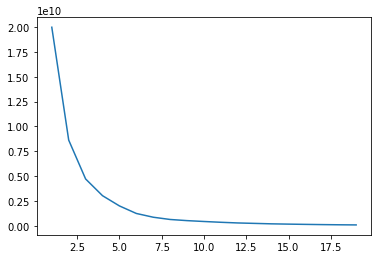

In [139]:
plt.plot(range(1,20) , wcss)

In [140]:
kmean = KMeans(n_clusters= 3 , init='k-means++' , random_state= 30)

In [141]:
Cluster = kmean.fit_predict(df[['REVENUE' , 'TOTAL_ORDERS']])

In [142]:
df['CLUSTER_number'] = Cluster
df.CLUSTER_number.unique()

array([2, 1, 0])

In [143]:
df1 = df[['REVENUE' , 'TOTAL_ORDERS']].values

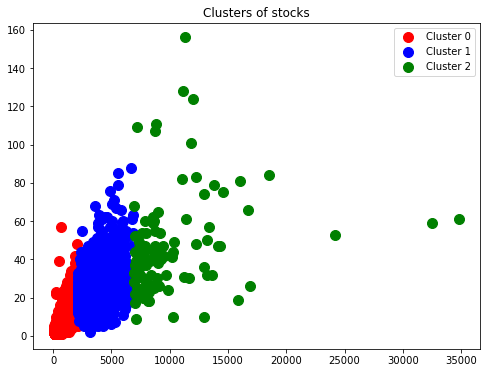

In [147]:
plt.figure(figsize=(8,6))
plt.scatter(df1[Cluster== 0, 0], df1[Cluster == 0, 1], s = 100, c = 'red', label = 'Cluster 0')
plt.scatter(df1[Cluster == 1, 0], df1[Cluster == 1, 1], s = 100, c = 'blue', label = 'Cluster 1')
plt.scatter(df1[Cluster == 2, 0], df1[Cluster == 2, 1], s = 100, c = 'green', label = 'Cluster 2')

#plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of stocks')
plt.legend()
plt.show()

In [148]:
print(f'Revenues for cluster 0 , MAX : {df[df.CLUSTER_number == 0].max().REVENUE} , MIN: {df[df.CLUSTER_number == 0].min().REVENUE}')
print(f'Revenues for cluster 1 , MAX : {df[df.CLUSTER_number == 1].max().REVENUE} , MIN: {df[df.CLUSTER_number == 1].min().REVENUE}')
print(f'Revenues for cluster 2 , MAX : {df[df.CLUSTER_number == 2].max().REVENUE} , MIN: {df[df.CLUSTER_number == 2].min().REVENUE}')


Revenues for cluster 0 , MAX : 2113.44 , MIN: 38.5
Revenues for cluster 1 , MAX : 6821.37 , MIN: 2114.41
Revenues for cluster 2 , MAX : 34847.4 , MIN: 6911.51


# From the above info we can see the clusters are properly divided on the basis of revenue generated

----------------------------------------------------------------

# Cluster 2 has the group of customers with highest revenue , Cluster 0 with the lowest ones

<ipython-input-301-66f11a52d4d9>:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  y = [df[df.CLUSTER_number == 0].mean().REVENUE,df[df.CLUSTER_number == 1].mean().REVENUE,df[df.CLUSTER_number ==2].mean().REVENUE ]
<ipython-input-301-66f11a52d4d9>:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  y = [df[df.CLUSTER_number == 0].mean().REVENUE,df[df.CLUSTER_number == 1].mean().REVENUE,df[df.CLUSTER_number ==2].mean().REVENUE ]
<ipython-input-301-66f11a52d4d9>:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  y = [df[df.CLUSTER_number == 0].mean().REVENUE,df[df.CLUSTER_number == 1].mean().REVENUE,df[df.CLUSTER_number ==2].mean().REVENUE ]


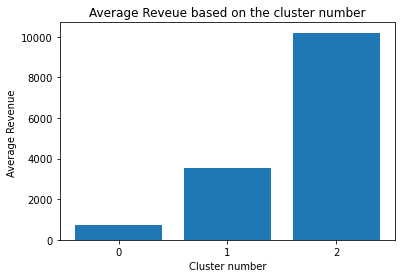

In [301]:
y = [df[df.CLUSTER_number == 0].mean().REVENUE,df[df.CLUSTER_number == 1].mean().REVENUE,df[df.CLUSTER_number ==2].mean().REVENUE ]
x = ['0','1','2']
plt.bar(x, y )
plt.xlabel("Cluster number")
plt.ylabel("Average Revenue ")
plt.title('Average Reveue based on the cluster number')
plt.savefig('Documents/Clu.png')

--------------------------------------------------------------------------------------------------------------------------------

In [242]:
df['Customer_for_days'] = Customerfor
df.Customer_for_days=df.Customer_for_days.dt.days
AVG = df[['CLUSTER_number' , 'CustomerID' , 'DAYSSINCELASTORDER']]#creating a seperate data frame that as cluster number and the number of days

In [243]:
AVG_Cluster2 = AVG[AVG.CLUSTER_number==2]   #dividing the df on the basis of cluster
AVG_Cluster1 = AVG[AVG.CLUSTER_number==1]     
AVG_Cluster0 = AVG[AVG.CLUSTER_number==0]

In [306]:
Champions_1 =AVG_Cluster2[AVG_Cluster2.DAYSSINCELASTORDER <=30] 
len(Champions_1)
#Customer which are in the cluster2(highest revenues) and DAYSSINCELASTORDER was less then 30 days (champions)

40

In [307]:
Potential_1 = AVG_Cluster2[(AVG_Cluster2.DAYSSINCELASTORDER >30) & (AVG_Cluster2.DAYSSINCELASTORDER <=60)] 
len(Potential_1)
#Customer which are in the cluster2(highest revenues) and their DAYSSINCELASTORDER was between 30-60days (Potential customers)

15

In [271]:
Attention_1=AVG_Cluster2[AVG_Cluster2.DAYSSINCELASTORDER >60] 
len(Attention_1)
#Customer which are in the cluster2(highest revenues) and their DAYSSINCELASTORDER was more than 90days ('need attention')

45

In [272]:
Champions_2 = AVG_Cluster1[AVG_Cluster1.DAYSSINCELASTORDER <=15]
len(Champions_2)
#Customer which are in the cluster1(middle range revenues)and their DAYSSINCELASTORDER was less then 15days ('champions')

344

In [273]:
Potential_2 = AVG_Cluster1[(AVG_Cluster1.DAYSSINCELASTORDER >15) & (AVG_Cluster1.DAYSSINCELASTORDER <=40)] 
len(Potential_2)
#Customer which are in the cluster1(middle range revenues) and their DAYSSINCELASTORDER was between 15-40days ('potential customers')

281

In [274]:
Attention_2 = AVG_Cluster1[AVG_Cluster1.DAYSSINCELASTORDER >40] 
len(Attention_2)
#Customer which are in the cluster1(middle range revenues) and their DAYSSINCELASTORDER wasmore than 40 days ('Need attention')

767

In [275]:
Potential_3=AVG_Cluster0[AVG_Cluster0.DAYSSINCELASTORDER <=20] 
len(Potential_3)
#Customer which are in the cluster0(lowest range revenues) and their DAYSSINCELASTORDER was less than 30 days ('potential customers')

1240

In [276]:
Attention_3 =AVG_Cluster0[AVG_Cluster0.DAYSSINCELASTORDER >20] 
len(Attention_3)

#Customer which are in the cluster0(lowest range revenues) and their DAYSSINCELASTORDER wasmore than 20 days ('Need attention')

2268

# Creating dataframe base on champion , potential and attention customers

In [265]:
CP = [Champions_1,Champions_2]
Champions = pd.concat(CP)  #creating a seprate dataframe for champions
PT = [Potential_1 , Potential_2 , Potential_3]
Potential_customers = pd.concat(PT) #creating a seprate dataframe for potential customers
AT = [Attention_1 ,Attention_2 , Attention_3]
Attention = pd.concat(AT) #creatina a seprate dataframe for need attention customer

In [278]:
len(Champions) + len(Potential_customers) + len(Attention)

5000

# Lets Check day wise revenue

In [280]:
A =df[['MONDAY_REVENUE','TUESDAY_REVENUE','WEDNESDAY_REVENUE','THURSDAY_REVENUE','FRIDAY_REVENUE','SATURDAY_REVENUE','SUNDAY_REVENUE']].sum()
A

MONDAY_REVENUE       1076041.68
TUESDAY_REVENUE      1167552.15
WEDNESDAY_REVENUE    1178446.47
THURSDAY_REVENUE     1329748.98
FRIDAY_REVENUE       1252902.77
SATURDAY_REVENUE     1098210.50
SUNDAY_REVENUE       1304716.65
dtype: float64

Text(0.5, 1.0, ' Reveue based on the days of week')

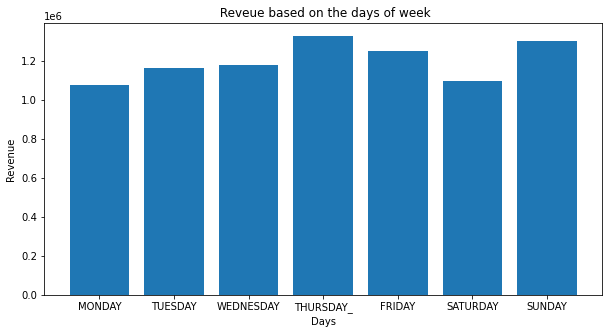

In [298]:
y = A
x = ['MONDAY', 'TUESDAY', 'WEDNESDAY',
       'THURSDAY_', 'FRIDAY', 'SATURDAY',
       'SUNDAY']
plt.figure(figsize=(10,5))
plt.bar(x, y )
plt.xlabel("Days")
plt.ylabel("Revenue ")
plt.title(' Reveue based on the days of week')


# As we can see mondays and saturdays have lowest revenues , we can create some weekly sale on this days to generate more revnue

In [302]:
Attention.CustomerID

2399         8
2426        71
2576        47
2589        30
2625        52
         ...  
4995    173946
4996    173987
4997    174004
4998    174038
4999    200783
Name: CustomerID, Length: 3080, dtype: int64

In [304]:
Potential_customers.CustomerID

1899        94
1929         6
1968        92
1987        19
2060        58
         ...  
1672      9651
1673     17148
1674     19685
1675     76063
1676    114829
Name: CustomerID, Length: 1536, dtype: int64

In [305]:
Attention.CustomerID

2399         8
2426        71
2576        47
2589        30
2625        52
         ...  
4995    173946
4996    173987
4997    174004
4998    174038
4999    200783
Name: CustomerID, Length: 3080, dtype: int64